In [1]:
from pynq import Overlay
from pynq import MMIO
import numpy as np
import struct
import binascii
import cmath
import random
import matplotlib.pyplot as plt
import time
from scipy import signal

In [2]:
ol=Overlay('./design_1.bit') #Change name of bitstream as required 
ol.download() # flash the FPGA
#ssh://xilinx/home/xilinx/jupyter_notebooks/WES237C_Fall2021/project1/demo/design_1.bit

In [3]:
fir11_ip=MMIO(0x41E00000,10000) #Change base address as required

y_ap_vld =  0x00
ap_clk =  0x04
#  ap_rst,  0x08
ap_start = 12
ap_done =   16
#ap_idle,   20
ap_ready = 24
y =        28
c_0=     32
#c_1, 0x36
#c_2, 0x40
#c_3,0x44
#c_4, 0x48
#c_5, 0x52
#c_6, 0x56
#c_7, 0x60
#c_8, 0x64
#c_9, 0x68
#c_10, 0x72
x = 76

taps = [53, 0, -91, 0, 313, 500, 313, 0, -91, 0, 53]
offset = c_0;

for tap in taps:
    fir11_ip.write(offset, tap)
    offset += 4;

100 -> 0
-2 -> 0
-100 -> 0
13 -> 0
97 -> 0
-36 -> 0
-86 -> 0
66 -> 0
59 -> 0
-93 -> 0
-10 -> 0
98 -> 0
-52 -> 0
-61 -> 0
97 -> 0
-17 -> 0
-81 -> 0
90 -> 0
-6 -> 0
-82 -> 0
92 -> 0
-21 -> 0
-66 -> 0
100 -> 0
-59 -> 0
-22 -> 0
86 -> 0
-97 -> 0
52 -> 0
18 -> 0
-77 -> 0
100 -> 0
-81 -> 0
32 -> 0
25 -> 0
-72 -> 0
97 -> 0
-97 -> 0
75 -> 0
-40 -> 0
0 -> 0
37 -> 0
-66 -> 0
87 -> 0
-97 -> 0
100 -> 0
-97 -> 0
90 -> 0
-81 -> 0
72 -> 0
-63 -> 0
57 -> 0
-52 -> 0
50 -> 0
-51 -> 0
54 -> 0
-59 -> 0
66 -> 0
-75 -> 0
84 -> 0
-92 -> 0
98 -> 0
-100 -> 0
95 -> 0
-81 -> 0
58 -> 0
-25 -> 0
-13 -> 0
52 -> 0
-84 -> 0
100 -> 0
-92 -> 0
59 -> 0
-6 -> 0
-51 -> 0
91 -> 0
-97 -> 0
61 -> 0
6 -> 0
-72 -> 0
100 -> 0
-70 -> 0
-6 -> 0
79 -> 0
-97 -> 0
41 -> 0
51 -> 0
-100 -> 0
59 -> 0
40 -> 0
-100 -> 0
54 -> 0
52 -> 0
-99 -> 0
25 -> 0
82 -> 0
-81 -> 0
-32 -> 0
100 -> 0
-18 -> 0
-92 -> 0
54 -> 0
75 -> 0
-75 -> 0
-59 -> 0
85 -> 0
51 -> 0
-87 -> 0
-52 -> 0
82 -> 0
63 -> 0
-70 -> 0
-81 -> 0
44 -> 0
97 -> 0
-3 -> 0
-97 -> 0


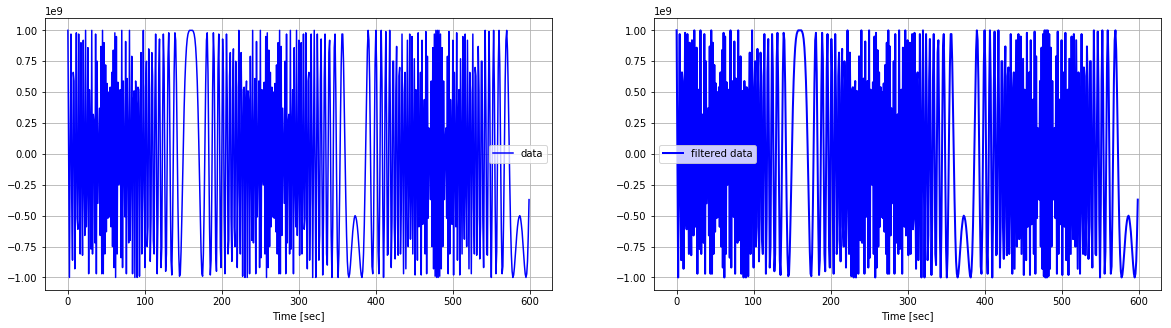

In [8]:

output = []

samples = []
fp = open("input.dat")
#print("starting")
while True:
    s = fp.readline()
    if len(s) == 0:
        break;

    n = int(s)
    
    #Starting and stopping the IP (Don't change this)
    fir11_ip.write(0x00,1)
    fir11_ip.write(0x00,0)
    fir11_ip.write(ap_clk,1)
    
    samples.append(n)
    fir11_ip.write(x, n)
    fir11_ip.write(ap_start, 1)
    fir11_ip.write(ap_ready, 1)
    #time.sleep(.1);
    out = fir11_ip.read(x)
    
    print(f"{n} -> {out}")
    output.append(n)
    
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.xlabel('Time [sec]')
plt.grid()
plt.plot([int(i*10000000) for i in samples],'b-',label='data')
plt.legend()

plt.subplot(1, 2, 2)
plt.xlabel('Time [sec]')
plt.grid()
plt.plot([int(i*10000000) for i in output],'b-',linewidth=2,label='filtered data')
plt.legend()